In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import seaborn as sns
%matplotlib inline

C:\Users\Tejes\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_train=pd.read_csv('train.csv',index_col=[0],parse_dates=True, squeeze=True)
df_test=pd.read_csv('test.csv')

In [3]:
df_train.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [4]:
df_test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [5]:
df_test.isnull().sum()

id       0
date     0
store    0
item     0
dtype: int64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   store   913000 non-null  int64
 1   item    913000 non-null  int64
 2   sales   913000 non-null  int64
dtypes: int64(3)
memory usage: 27.9 MB


In [7]:
df_train.size

2739000

In [8]:
df_test.size

180000

In [9]:
df_train.shape

(913000, 3)

In [10]:
df_test.shape

(45000, 4)

In [11]:
df_train.columns

Index(['store', 'item', 'sales'], dtype='object')

In [12]:
df_train['item'].nunique()

50

In [13]:
df_train['item']==1

date
2013-01-01     True
2013-01-02     True
2013-01-03     True
2013-01-04     True
2013-01-05     True
              ...  
2017-12-27    False
2017-12-28    False
2017-12-29    False
2017-12-30    False
2017-12-31    False
Name: item, Length: 913000, dtype: bool

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   store   913000 non-null  int64
 1   item    913000 non-null  int64
 2   sales   913000 non-null  int64
dtypes: int64(3)
memory usage: 27.9 MB


In [15]:
df_train.columns

Index(['store', 'item', 'sales'], dtype='object')

In [16]:
item_1=df_train.loc[df_train['item']==1]

In [17]:
sales_1=item_1['sales'].resample('MS').mean()

<AxesSubplot:xlabel='date'>

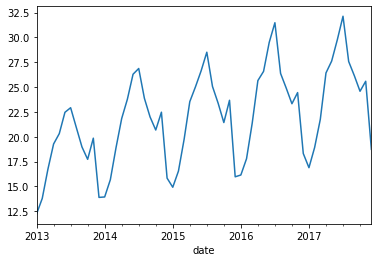

In [18]:
sales_1.plot()

In [19]:
item_2=df_train.loc[df_train['item']==2]

In [20]:
sales_2=item_2['sales'].resample('MS').mean()

<AxesSubplot:xlabel='date'>

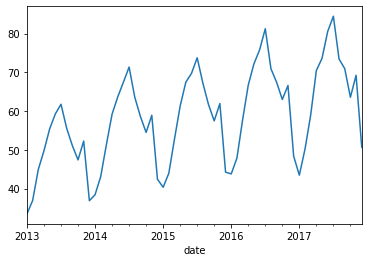

In [21]:
sales_2.plot()

In [22]:
from pylab import rcParams

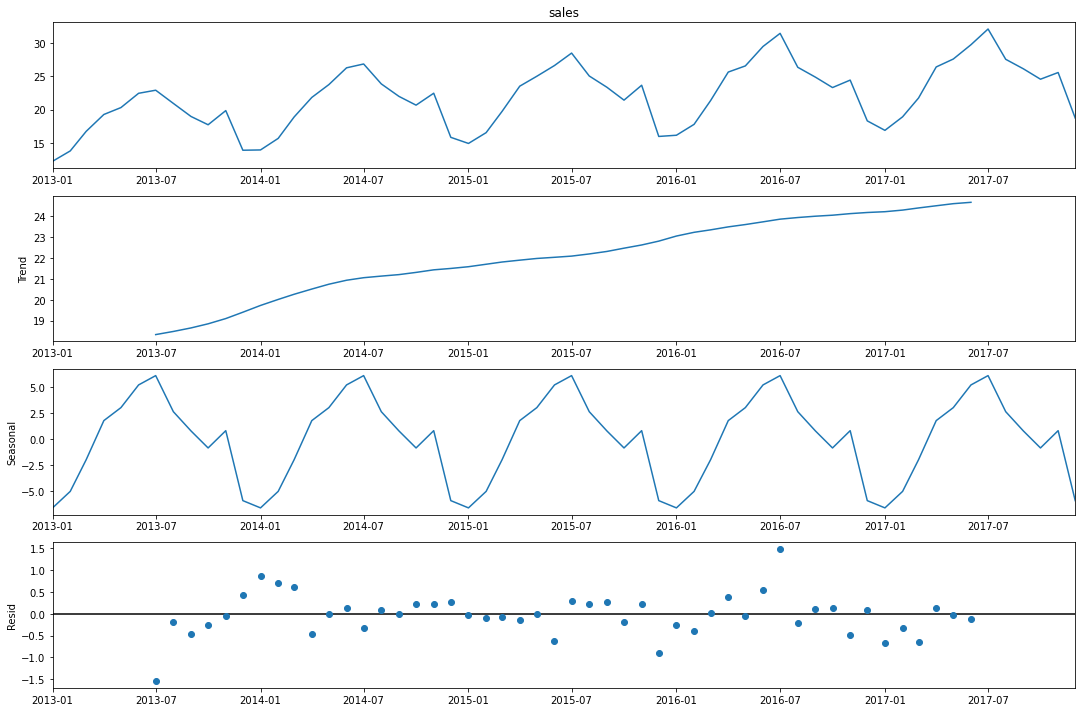

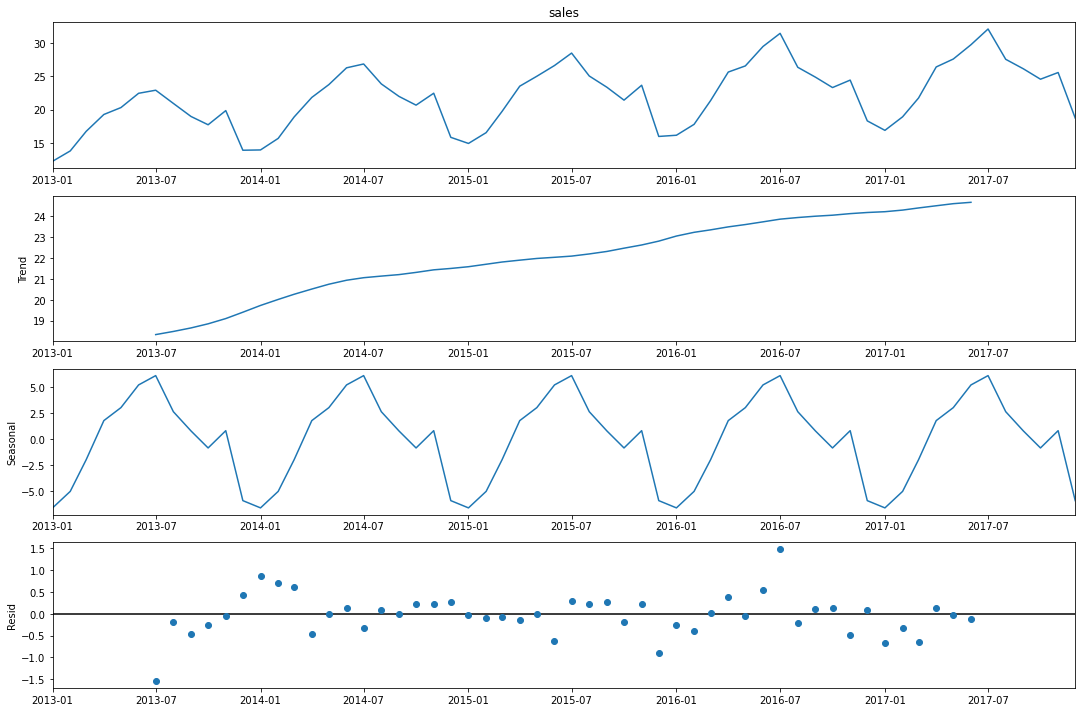

In [23]:
rcParams['figure.figsize']= 15,10
decomposition=sms.tsa.seasonal_decompose(sales_1,model='additive')
decomposition.plot()

In [24]:
df_train['store'].nunique()

10

In [25]:
item_1.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [26]:
import warnings
warnings.filterwarnings('ignore')
item_1['sales: 10 days rolling'] = item_1['sales'].rolling(window=10,min_periods=1).mean()

In [27]:
item_1.head()

,store,item,sales,sales: 10 days rolling
date,,,,
2013-01-01,1,1,13,13.000000
2013-01-02,1,1,11,12.000000
2013-01-03,1,1,14,12.666667
2013-01-04,1,1,13,12.750000
2013-01-05,1,1,10,12.200000


<AxesSubplot:xlabel='date'>

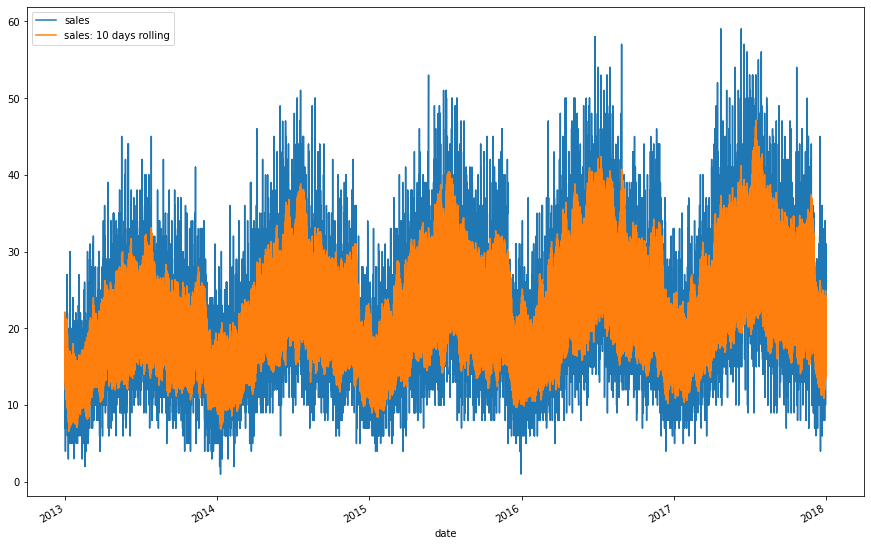

In [28]:
item_1[['sales','sales: 10 days rolling']].plot()

<AxesSubplot:xlabel='date'>

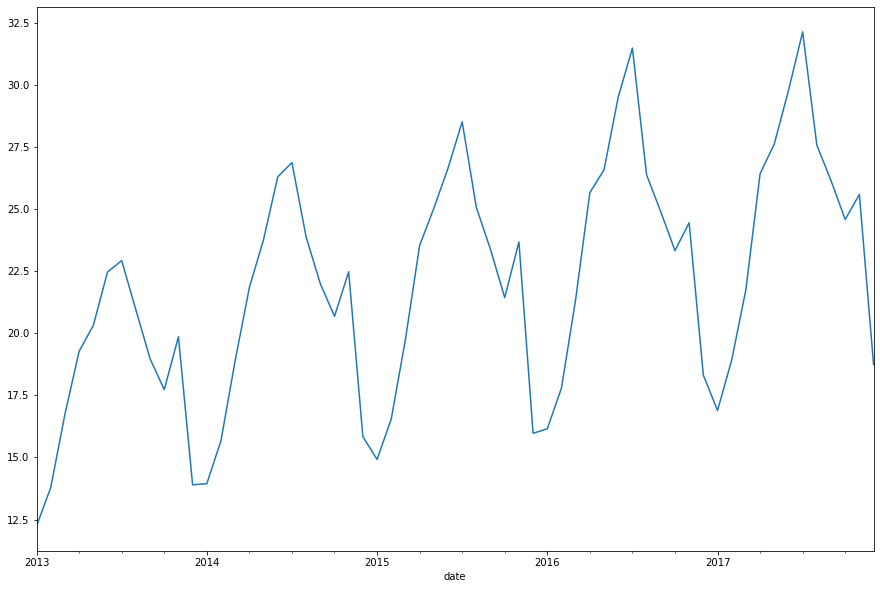

In [29]:
sales_1.plot()

In [30]:
# Simple Moving Average
sales_1MA=sales_1.rolling(window=10,min_periods=1).mean()

In [31]:
sales_1plot=pd.concat([sales_1,sales_1MA],axis=1)

In [32]:
sales_1plot.columns=['sales_1','sales_10 days rolling']

<AxesSubplot:xlabel='date'>

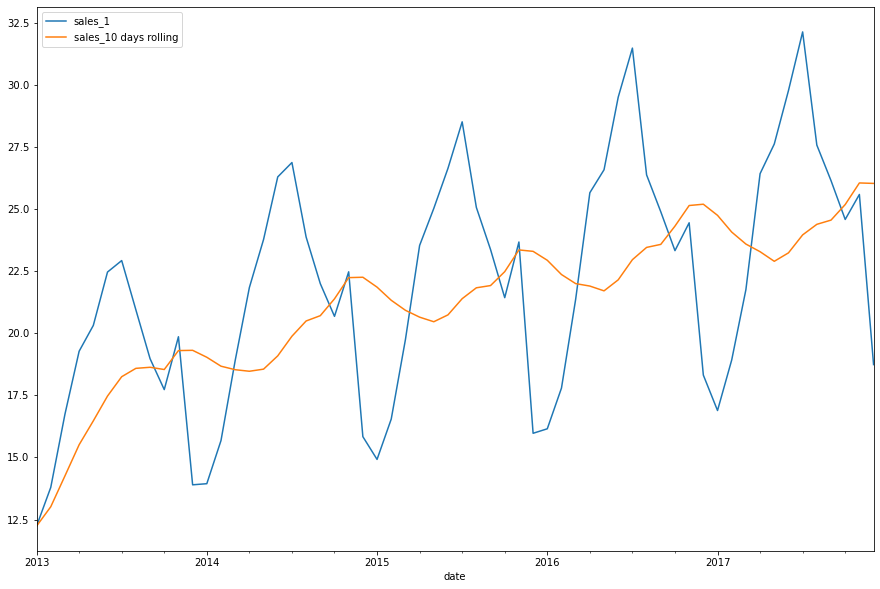

In [33]:
sales_1plot[['sales_1','sales_10 days rolling']].plot()

In [34]:
# Cumulative Moving Average(CMA)
sales_1CMA= sales_1.expanding().mean()

In [35]:
sales_1CMA_plot=pd.concat([sales_1CMA,sales_1],axis=1)

In [36]:
sales_1CMA_plot.columns=['Sales_CMA','Sales']

<AxesSubplot:xlabel='date'>

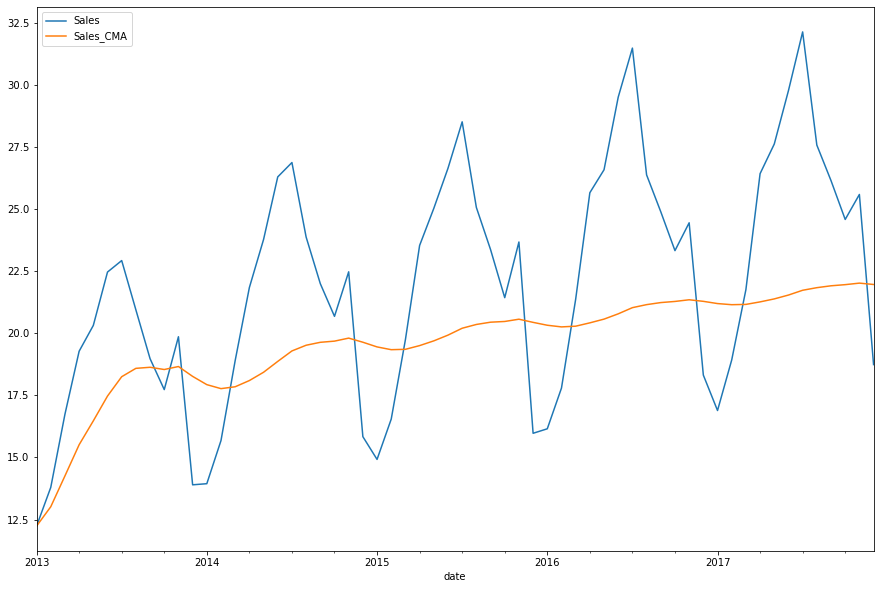

In [37]:
sales_1CMA_plot[['Sales','Sales_CMA']].plot()

In [38]:
# Smoothning using Exponential Moving Average(EMA)
sales_1EMA= sales_1.ewm(alpha=0.3,adjust=False).mean()

In [39]:
sales_1EMA_plot=pd.concat([sales_1,sales_1EMA],axis=1)

In [40]:
sales_1EMA_plot.columns=['sales_1','sales_1EMA0.3']

<AxesSubplot:xlabel='date'>

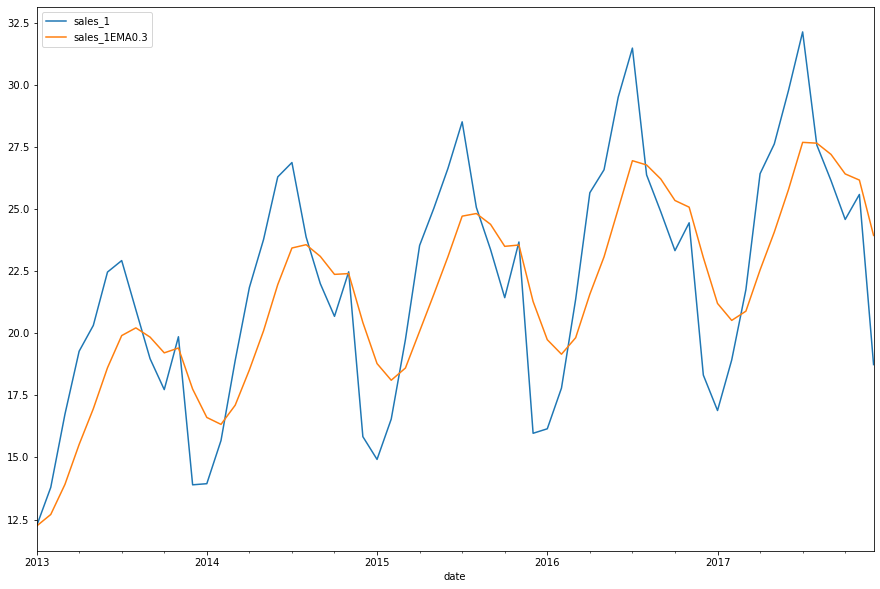

In [41]:
sales_1EMA_plot[['sales_1','sales_1EMA0.3']].plot()

In [42]:
# Using Exponential Weighted Moving Average
sales_1EWMA=sales_1.ewm(span=5).mean()

In [43]:
sales_1EMA_plot=pd.concat([sales_1,sales_1EMA,sales_1EWMA],axis=1)

In [44]:
sales_1EMA_plot.columns=['sales_1','sales_1EMA0.3','EWMA_5days']

<AxesSubplot:xlabel='date'>

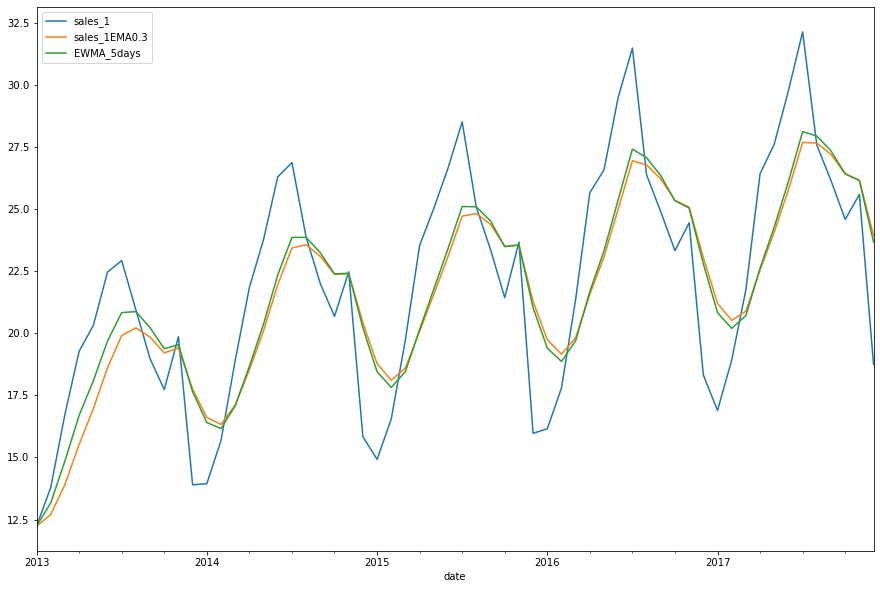

In [45]:
sales_1EMA_plot[['sales_1','sales_1EMA0.3','EWMA_5days']].plot()

In [46]:
### Preparing a base line model
sales_1_base=pd.concat([sales_1,sales_1.shift(1)],axis=1)

In [47]:
sales_1_base.columns=['Actual_Sales','Forecast_Sales']


In [48]:
sales_1_base.head()

,Actual_Sales,Forecast_Sales
date,,
2013-01-01,12.238710,NaN
2013-02-01,13.796429,12.238710
2013-03-01,16.741935,13.796429
2013-04-01,19.276667,16.741935
2013-05-01,20.316129,19.276667


In [49]:
sales_1_base.dropna(inplace=True)

In [50]:
from sklearn.metrics import mean_squared_error
sales_error=mean_squared_error(sales_1_base. Actual_Sales,sales_1_base.Forecast_Sales)

In [51]:
sales_error

8.870848213699702

In [52]:
np.sqrt(sales_error)

2.9783969201064693

In [53]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

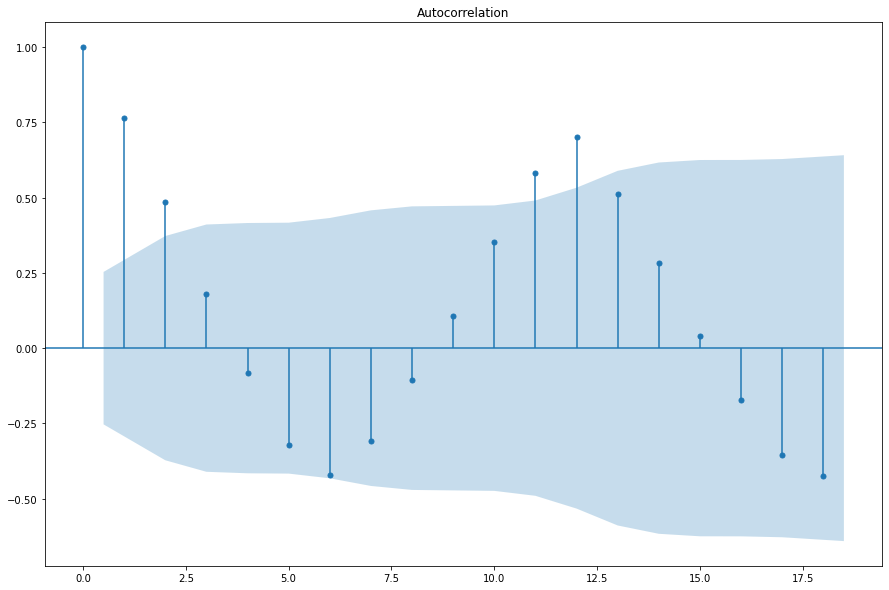

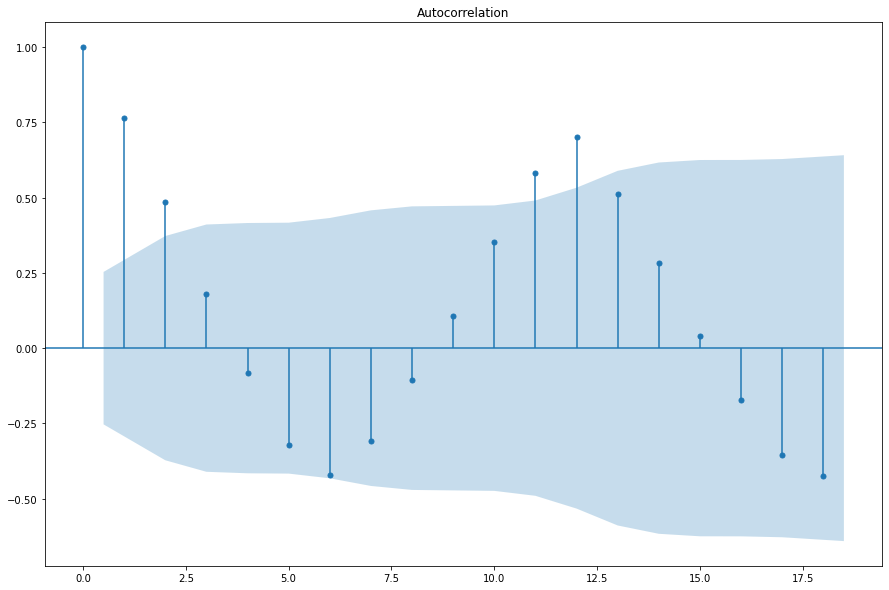

In [54]:
plot_acf(sales_1)

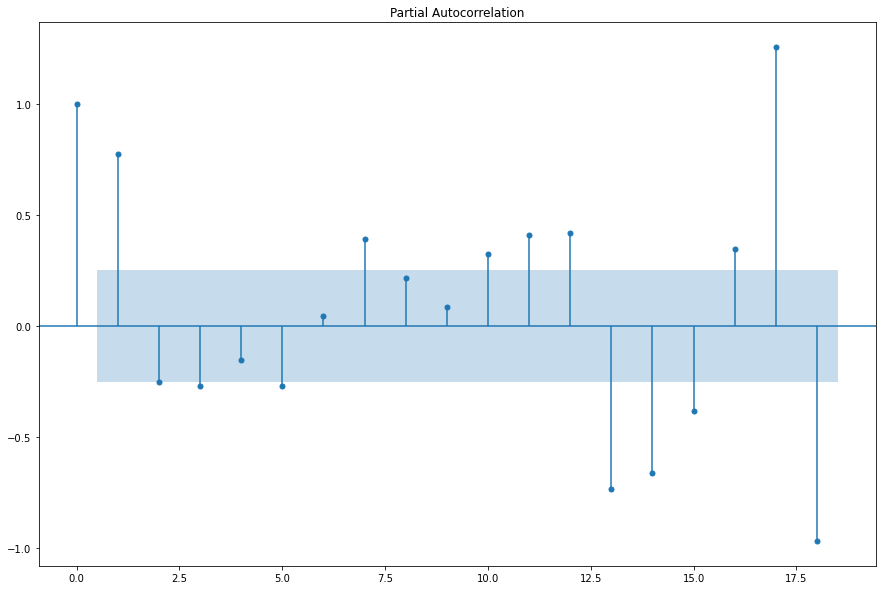

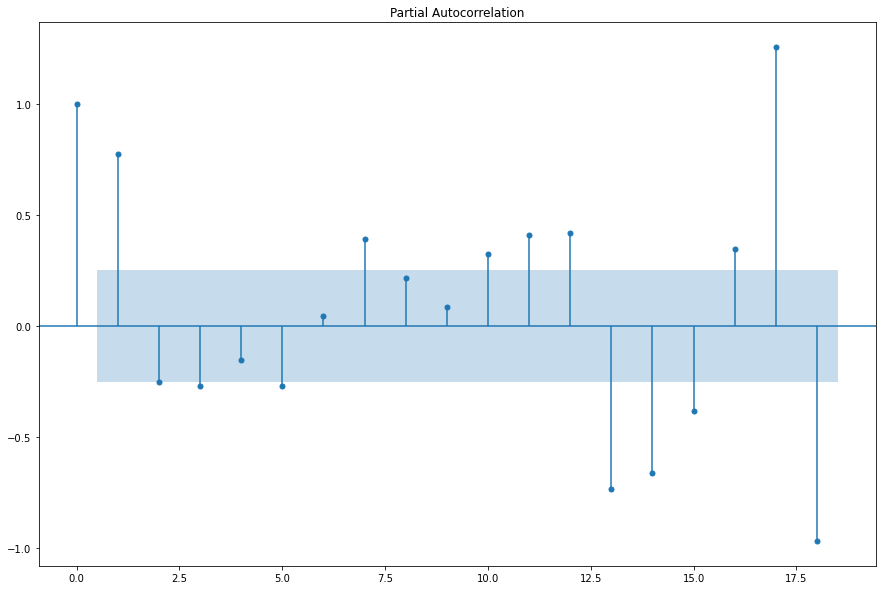

In [55]:
plot_pacf(sales_1)

In [56]:
# q - 2, p - 1 and d - (0,2)
from statsmodels.tsa.arima_model import ARIMA

In [57]:
sales_1_train=sales_1[0:45]
sales_1_test=sales_1[45:60]

In [58]:
sales_1_model=ARIMA(sales_1_train,order=(7,1,2))

In [59]:
sales_1_model_fit=sales_1_model.fit()

In [60]:
sales_1_model_fit.aic

196.8975478271573

In [61]:
sales_1_model_fit.forecast(steps=15)[0]

array([23.5543437 , 21.64686559, 19.31068305, 18.60966306, 20.38977888,
       23.23584425, 26.02857435, 28.44005086, 30.30507084, 31.01668407,
       30.12345154, 27.93274471, 25.26609296, 22.90973252, 21.41127353])

In [62]:
sales_1_forecast=sales_1_model_fit.forecast(steps=15)[0]

In [63]:
np.sqrt(mean_squared_error(sales_1_test,sales_1_forecast))

1.6934450228369984

In [64]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result= adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1]<=0.05:
        print('Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary')
    else:
        print('Weak evidence against null hypothesis. Time series has unit root, indicating non-stationary')
        

In [65]:
adf_test(sales_1)

ADF Statistics: -4.948417637635621
p-value: 2.8046320099465874e-05
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [66]:
sales_1_12_differencing=sales_1-sales_1.shift(12)

In [67]:
sales_1_12_differencing=sales_1_12_differencing.dropna()

In [68]:
seasonal_sales_1=pd.concat([sales_1,sales_1_12_differencing],axis=1)

In [69]:
seasonal_sales_1.columns=['sales','sales_12_differencing']

In [70]:
seasonal_sales_1.columns

Index(['sales', 'sales_12_differencing'], dtype='object')

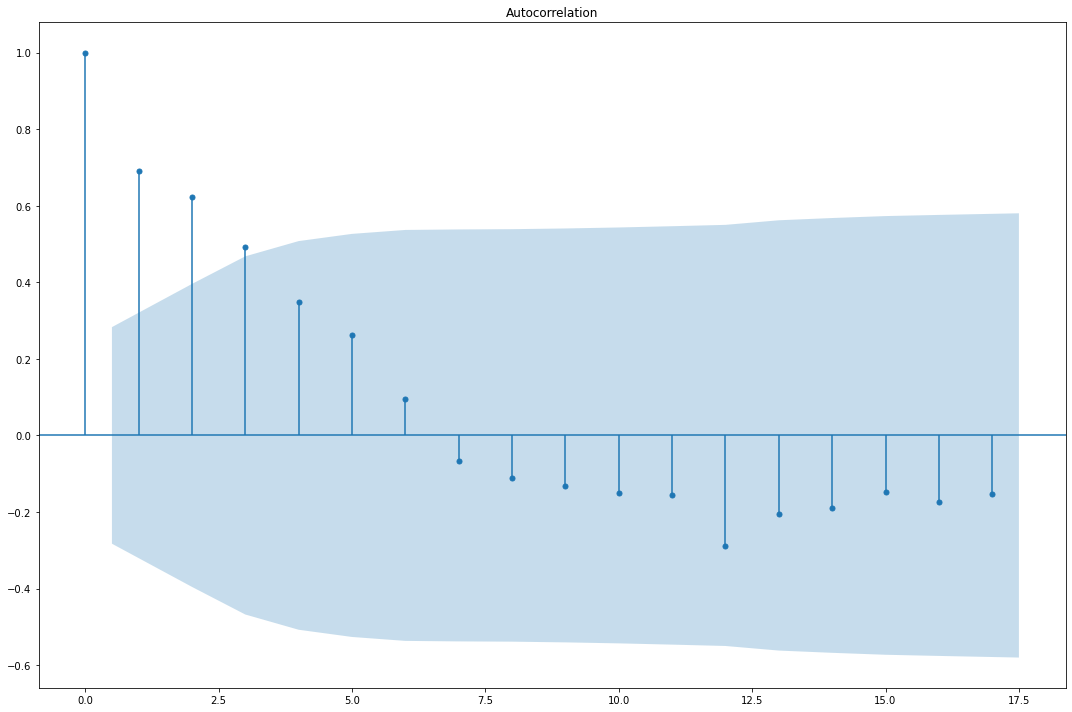

In [71]:
# Plotting acf on sales with 12 months differencing
plot_acf(sales_1_12_differencing)
plt.tight_layout()

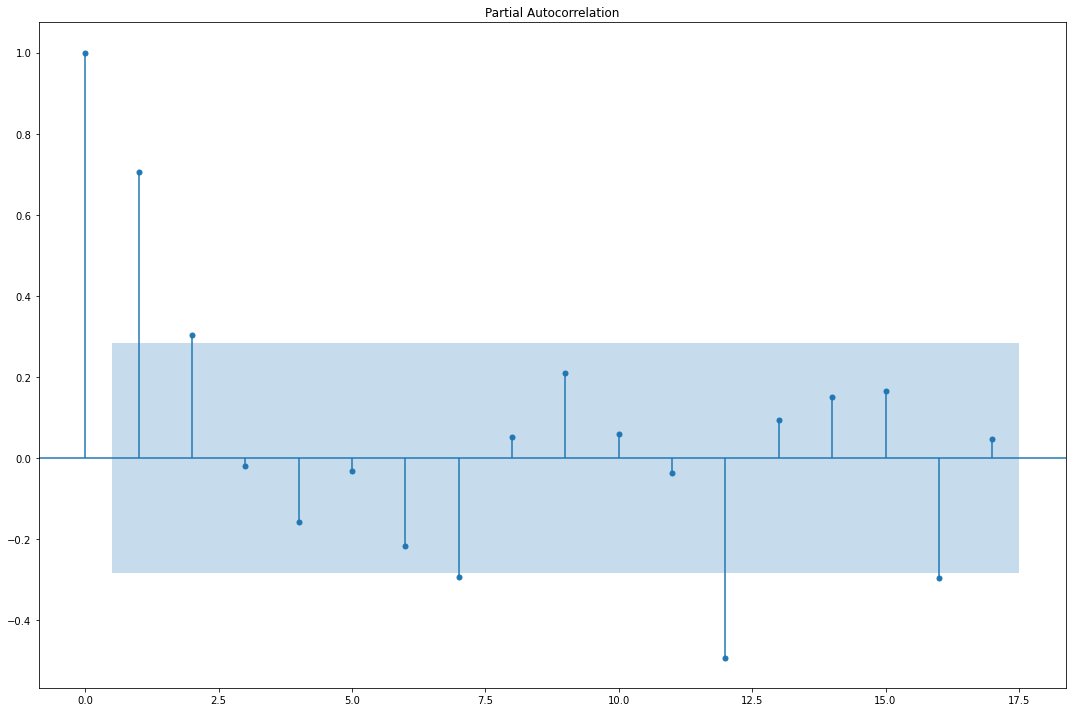

In [72]:
# plotting pacf for 12months differencing in sales
plot_pacf(sales_1_12_differencing)
plt.tight_layout()

In [73]:
# q-3, p-2 or 7

In [74]:
# Prediction
pred_start_date=sales_1_test.index[0]
pred_end_date=sales_1_test.index[-1]
print(pred_start_date)
print(pred_end_date)

2016-10-01 00:00:00
2017-12-01 00:00:00


In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [76]:
model_SARIMA=SARIMAX(sales_1,order=(3,1,7),seasonal_order=(0,1,0,12))

In [77]:
model_SARIMA_fit=model_SARIMA.fit()

In [78]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               sales   No. Observations:                   60
Model:             SARIMAX(3, 1, 7)x(0, 1, [], 12)   Log Likelihood                 -38.644
Date:                             Sat, 08 Oct 2022   AIC                             99.289
Time:                                     10:50:35   BIC                            119.640
Sample:                                 01-01-2013   HQIC                           106.947
                                      - 12-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3746      0.543     -0.689      0.491      -1.440       0.691
ar.L2         -0.4271      0.323     -1.323      0.186      -1.060       0.205
ar.L3         -0.9585      0.538     -1.783      0.075      -2.012       0.095
ma.L1         -0.1746     26.208     -0.007      0.995     -51.542      51.192
ma.L2          0.8748     30.417      0.029      0.977     -58.742      60.492
ma.L3          1.1752     60.242      0.020      0.984    -116.898     119.248
ma.L4         -0.3993     23.890     -0.017      0.987     -47.222      46.424
ma.L5          0.7431     22.746      0.033      0.974     -43.839      45.325
ma.L6          0.0686      7.605      0.009      0.993     -14.837      14.974
ma.L7         -0.2009      7.603     -0.026      0.979     -15.102      14.701
sigma2         0.2354      8.561      0.027      0.978     -16.544      17.015
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.63
Prob(Q):                              0.99   Prob(JB):                         0.44
Heteroskedasticity (H):               0.80   Skew:                             0.39
Prob(H) (two-sided):                  0.67   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
pred_ARIMA=sales_1_model_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=sales_1-pred_ARIMA

In [80]:
residuals

2013-01-01          NaN
2013-02-01          NaN
2013-03-01          NaN
2013-04-01          NaN
2013-05-01          NaN
2013-06-01          NaN
2013-07-01          NaN
2013-08-01          NaN
2013-09-01          NaN
2013-10-01          NaN
2013-11-01          NaN
2013-12-01          NaN
2014-01-01          NaN
2014-02-01          NaN
2014-03-01          NaN
2014-04-01          NaN
2014-05-01          NaN
2014-06-01          NaN
2014-07-01          NaN
2014-08-01          NaN
2014-09-01          NaN
2014-10-01          NaN
2014-11-01          NaN
2014-12-01          NaN
2015-01-01          NaN
2015-02-01          NaN
2015-03-01          NaN
2015-04-01          NaN
2015-05-01          NaN
2015-06-01          NaN
2015-07-01          NaN
2015-08-01          NaN
2015-09-01          NaN
2015-10-01          NaN
2015-11-01          NaN
2015-12-01          NaN
2016-01-01          NaN
2016-02-01          NaN
2016-03-01          NaN
2016-04-01          NaN
2016-05-01          NaN
2016-06-01      

<AxesSubplot:xlabel='date'>

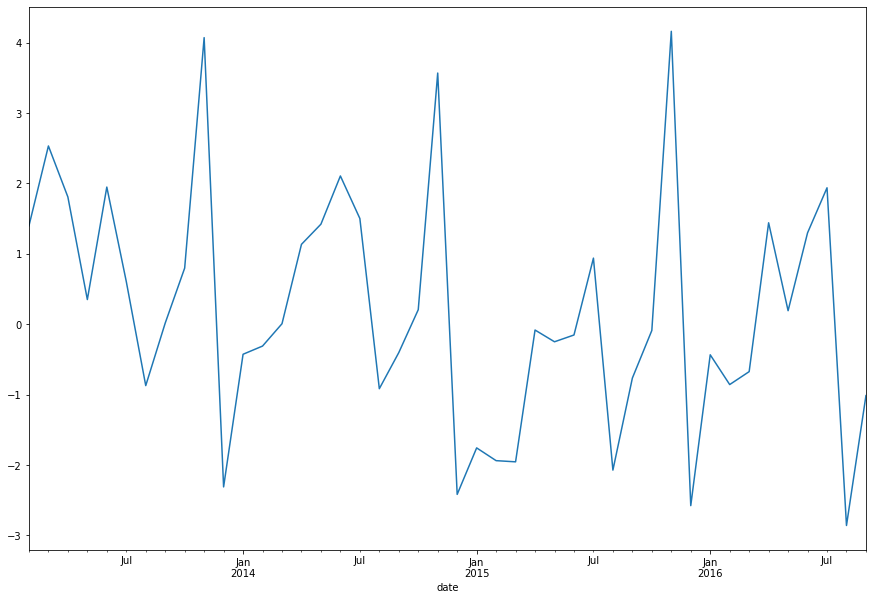

In [81]:
sales_1_model_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

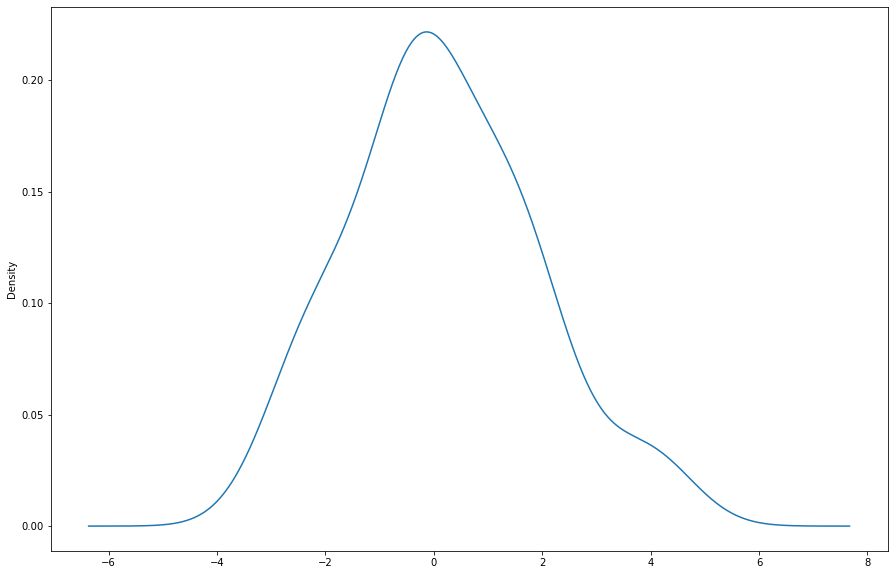

In [82]:
sales_1_model_fit.resid.plot(kind='kde')

In [83]:
pred_SARIMA=model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=sales_1-pred_SARIMA

<AxesSubplot:xlabel='date'>

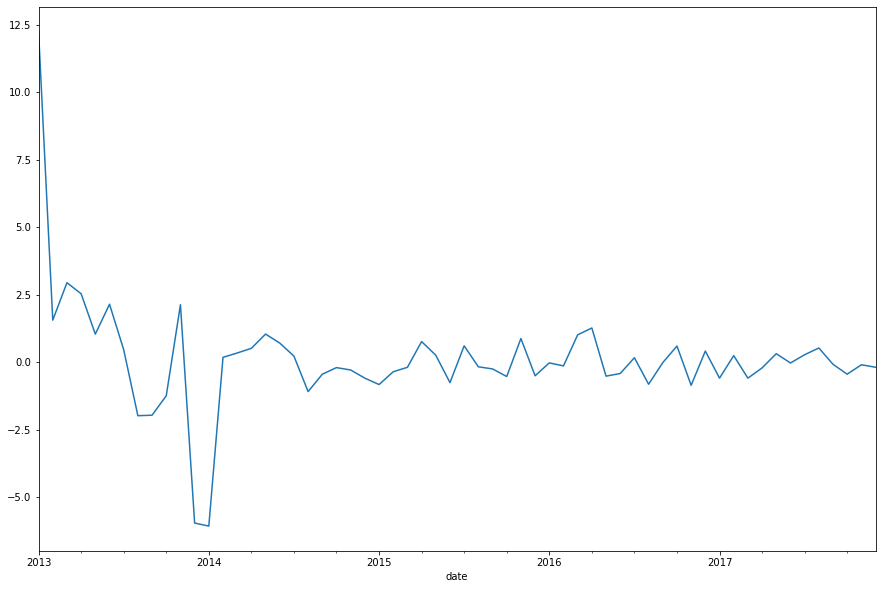

In [84]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

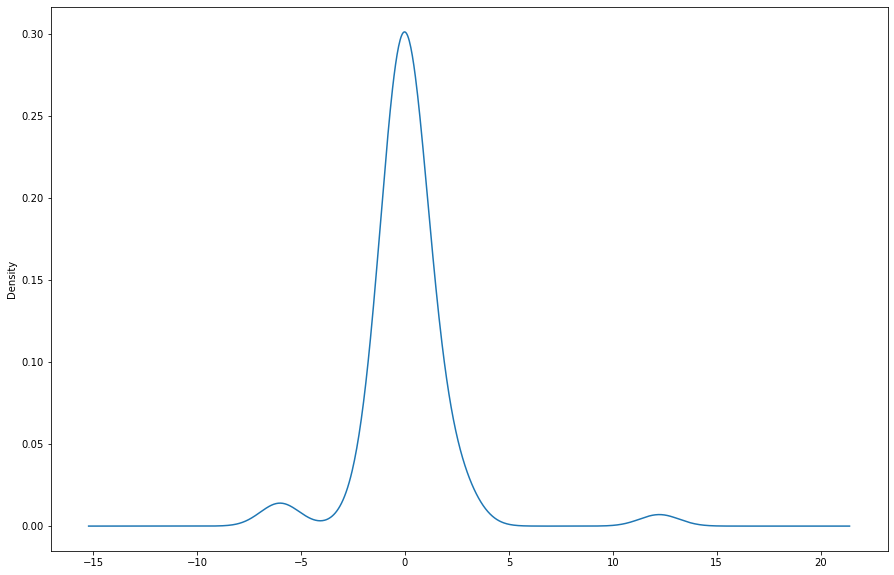

In [85]:
model_SARIMA_fit.resid.plot(kind='kde')

In [86]:
sales_1_SARIMA=pd.concat([sales_1,pred_ARIMA,pred_SARIMA,sales_1_base['Forecast_Sales']],axis=1)
sales_1_SARIMA.columns=['Sales_1','Predicted ARIMA','Predicted_SARIMA','Base_Model']

<AxesSubplot:>

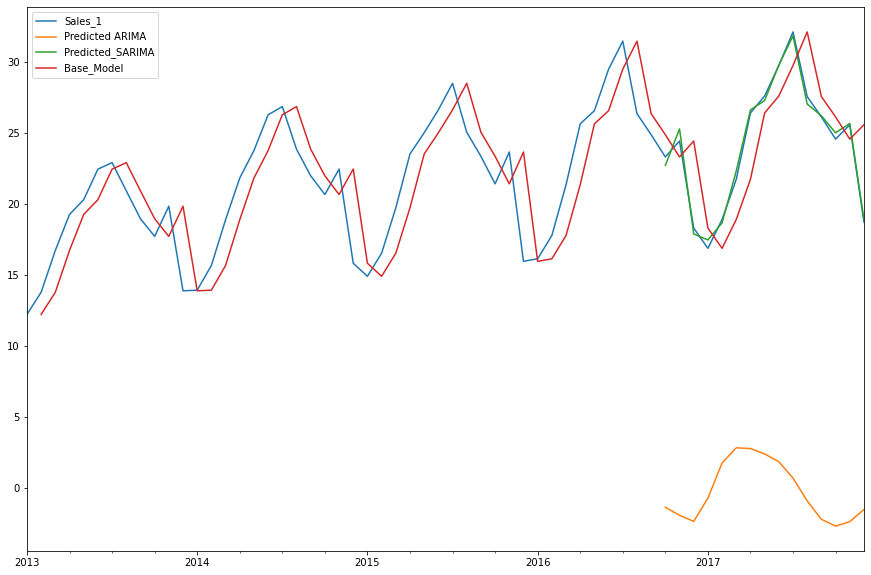

In [87]:
# Quallitative prediction analysis of SARIMAX, ARIMA, Base Line Model
sales_1_SARIMA.plot()

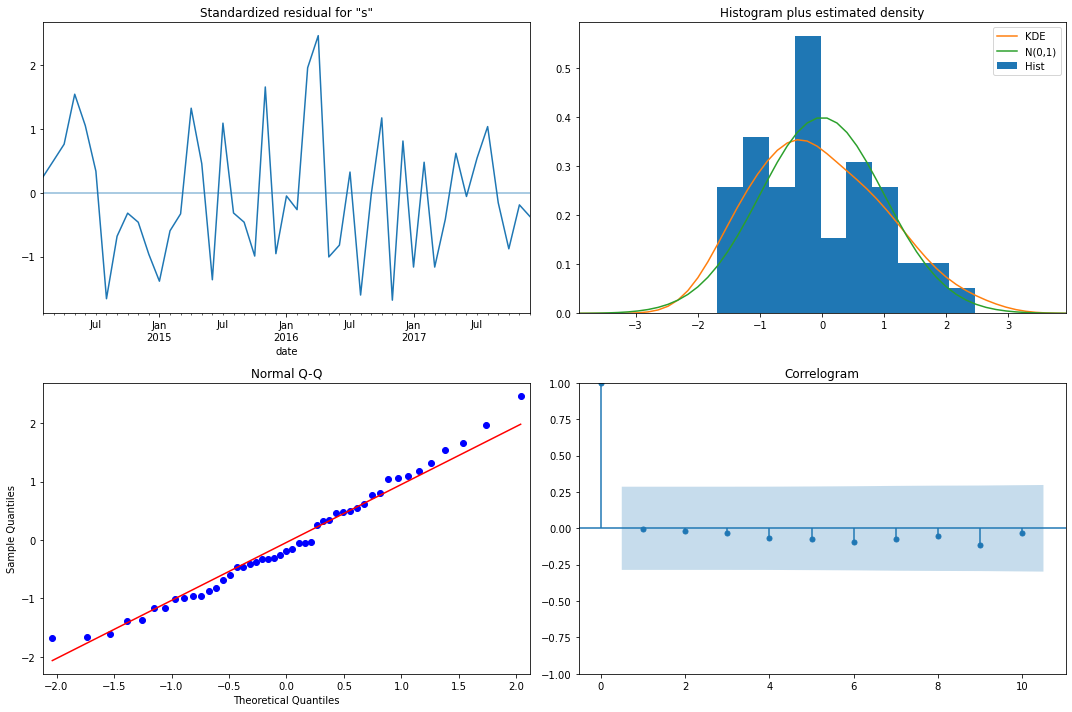

In [88]:
model_SARIMA_fit.plot_diagnostics()
plt.tight_layout()

In [89]:
df_test.tail()

,id,date,store,item
44995,44995,2018-03-27,10,50
44996,44996,2018-03-28,10,50
44997,44997,2018-03-29,10,50
44998,44998,2018-03-30,10,50
44999,44999,2018-03-31,10,50


In [90]:
# Quantitative prediction analysis of SARIMAX
np.sqrt(mean_squared_error(sales_1_test,pred_SARIMA))

0.42939812273663447

In [91]:
# Quantitative prediction analysis of ARIMA
np.sqrt(mean_squared_error(sales_1_test,pred_ARIMA))

24.759388675340283

In [92]:
# # Quantitative prediction analysis of Base Line Model
np.sqrt(mean_squared_error(sales_1_base.Actual_Sales,sales_1_base.Forecast_Sales))

2.9783969201064693

In [93]:
from pandas.tseries.offsets import DateOffset
future_dates=[sales_1_test.index[-1]+DateOffset(months=x) for x in range(0,13)]

In [94]:
future_df=pd.DataFrame(index=future_dates[1:], columns=['sales'])

In [95]:
future_df.tail()

,sales
2018-08-01,NaN
2018-09-01,NaN
2018-10-01,NaN
2018-11-01,NaN
2018-12-01,NaN


In [96]:
future_forecast=pd.concat([sales_1,future_df])

In [97]:
future_forecast.columns=['sales','null']

In [98]:
future_forecast.tail()

,sales,null
2018-08-01,NaN,NaN
2018-09-01,NaN,NaN
2018-10-01,NaN,NaN
2018-11-01,NaN,NaN
2018-12-01,NaN,NaN


In [99]:
future_dates[-1]

Timestamp('2018-12-01 00:00:00')

In [100]:
future_forecast['SARIMAX_Forecast']=model_SARIMA_fit.predict(start=future_dates[0],end=future_dates[-1],dynamic=True)

In [101]:
future_forecast.head()

,sales,null,SARIMAX_Forecast
2013-01-01,12.238710,NaN,NaN
2013-02-01,13.796429,NaN,NaN
2013-03-01,16.741935,NaN,NaN
2013-04-01,19.276667,NaN,NaN
2013-05-01,20.316129,NaN,NaN


<AxesSubplot:>

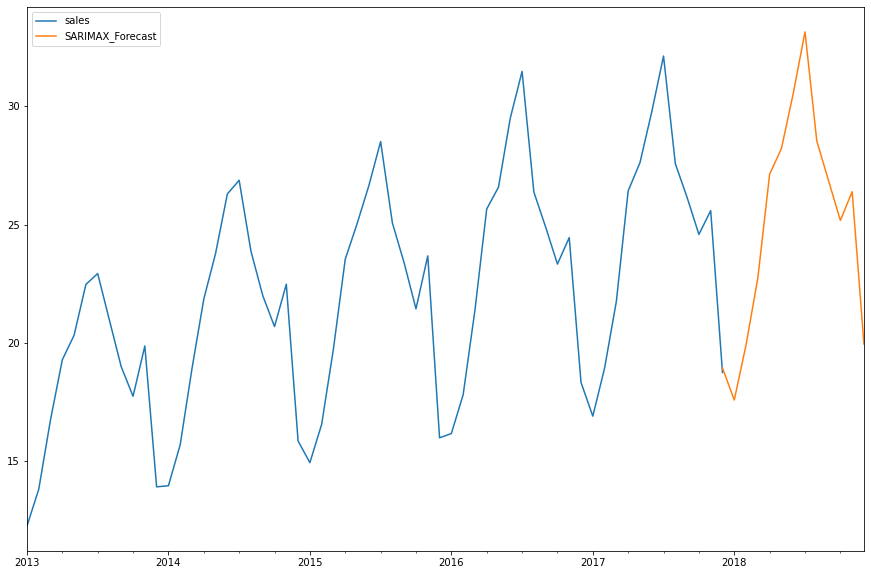

In [102]:
future_forecast[['sales','SARIMAX_Forecast']].plot()

In [103]:
future_forecast['SARIMAX_Forecast'][60:]

2018-01-01    17.571852
2018-02-01    19.910343
2018-03-01    22.739031
2018-04-01    27.131024
2018-05-01    28.212530
2018-06-01    30.541753
2018-07-01    33.149736
2018-08-01    28.533251
2018-09-01    26.849319
2018-10-01    25.172336
2018-11-01    26.388337
2018-12-01    19.941570
Name: SARIMAX_Forecast, dtype: float64

In [104]:
df_train.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [105]:
product_sales_1=df_train.loc[df_train['item']==1]
product_sales_2=df_train.loc[df_train['item']==2]
product_sales_3=df_train.loc[df_train['item']==3]
product_sales_4=df_train.loc[df_train['item']==4]
product_sales_5=df_train.loc[df_train['item']==5]

In [106]:
product_sales_1.drop(['store','item'],axis=1)
product_sales_2.drop(['store','item'],axis=1)
product_sales_3.drop(['store','item'],axis=1)
product_sales_4.drop(['store','item'],axis=1)
product_sales_5.drop(['store','item'],axis=1)

,sales
date,
2013-01-01,11
2013-01-02,6
2013-01-03,8
2013-01-04,9
2013-01-05,8
...,...
2017-12-27,19
2017-12-28,14
2017-12-29,20


In [107]:
product_sales_1.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=18260, freq=None)

In [108]:
y_sales_1=product_sales_1['sales'].resample('MS').mean()
y_sales_2=product_sales_2['sales'].resample('MS').mean()
y_sales_3=product_sales_3['sales'].resample('MS').mean()
y_sales_4=product_sales_4['sales'].resample('MS').mean()
y_sales_5=product_sales_5['sales'].resample('MS').mean()

In [109]:
product_sales_1=pd.DataFrame({'date':y_sales_1.index, 'Sales':y_sales_1.values})
product_sales_2=pd.DataFrame({'date':y_sales_2.index, 'Sales':y_sales_2.values})
product_sales_3=pd.DataFrame({'date':y_sales_3.index, 'Sales':y_sales_3.values})
product_sales_4=pd.DataFrame({'date':y_sales_4.index, 'Sales':y_sales_4.values})
product_sales_5=pd.DataFrame({'date':y_sales_5.index, 'Sales':y_sales_5.values})

In [110]:
product_sales_1.set_index('date')
product_sales_2.set_index('date')
product_sales_3.set_index('date')
product_sales_4.set_index('date')
product_sales_5.set_index('date')

,Sales
date,
2013-01-01,10.009677
2013-02-01,11.500000
2013-03-01,13.893548
2013-04-01,15.763333
2013-05-01,17.393548
2013-06-01,18.803333
2013-07-01,19.116129
2013-08-01,17.345161
2013-09-01,16.210000


In [111]:
sales_data=pd.concat([y_sales_1,y_sales_2,y_sales_3,y_sales_4,y_sales_5],axis=1)

In [112]:
sales_data.columns=['Sales_item1','Sales_item2','Sales_item3','Sales_item4','Sales_item5']

In [113]:
sales_data.head()

,Sales_item1,Sales_item2,Sales_item3,Sales_item4,Sales_item5
date,,,,,
2013-01-01,12.238710,33.480645,20.467742,11.993548,10.009677
2013-02-01,13.796429,36.921429,23.317857,14.000000,11.500000
2013-03-01,16.741935,44.945161,27.567742,16.922581,13.893548
2013-04-01,19.276667,49.793333,32.346667,19.446667,15.763333
2013-05-01,20.316129,55.416129,34.693548,20.770968,17.393548


Text(0.5, 1.0, 'Sales Trend for Item 1, Item 2, Item 3, Item 4, Item 5')

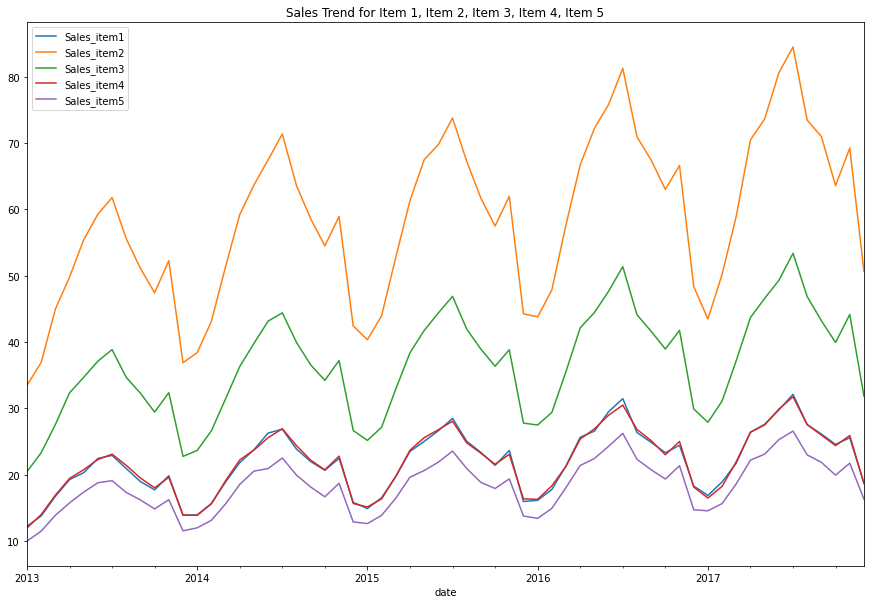

In [114]:
# Comparing Product Sales
sales_data.plot()
plt.title('Sales Trend for Item 1, Item 2, Item 3, Item 4, Item 5')


!pip install pystan fbprophet

pip install pystan

!pip install pystan fbprophet

!pip install fbprophet

import fbprophet

In [115]:
product_sales_1.head()

,date,Sales
0,2013-01-01,12.238710
1,2013-02-01,13.796429
2,2013-03-01,16.741935
3,2013-04-01,19.276667
4,2013-05-01,20.316129


In [116]:
product_sales_1.columns=['ds','y']
product_sales_2.columns=['ds','y']
product_sales_3.columns=['ds','y']
product_sales_4.columns=['ds','y']
product_sales_5.columns=['ds','y']

<AxesSubplot:>

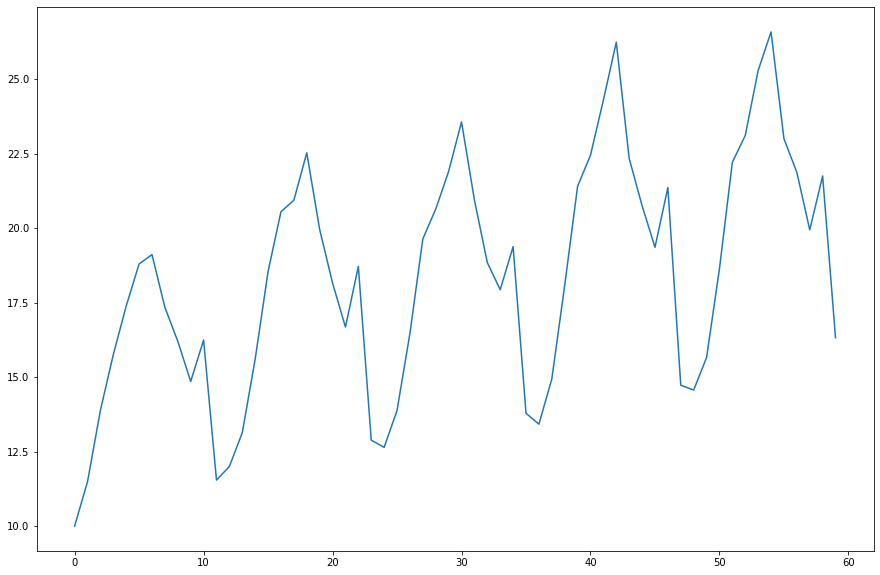

In [117]:
product_sales_5['y'].plot()

In [118]:
adf_test(product_sales_1['y'])

ADF Statistics: -4.948417637635621
p-value: 2.8046320099465874e-05
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [119]:
adf_test(product_sales_2['y'])

ADF Statistics: -5.115244223054127
p-value: 1.3062542778538887e-05
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [120]:
adf_test(product_sales_3['y'])

ADF Statistics: -5.521607626529608
p-value: 1.872180082231389e-06
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [121]:
adf_test(product_sales_4['y'])

ADF Statistics: -5.51103464553592
p-value: 1.9719591183226434e-06
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [122]:
adf_test(product_sales_5['y'])

ADF Statistics: -3.991642844370294
p-value: 0.0014549095512541657
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [123]:
from prophet import Prophet
product_1_model=Prophet(interval_width=0.8)

In [124]:
product_1_model.fit(product_sales_1)

10:51:07 - cmdstanpy - INFO - Chain [1] start processing
10:51:09 - cmdstanpy - INFO - Chain [1] done processing


In [125]:
future_dates=product_1_model.make_future_dataframe(periods=36,freq='MS')
future_dates

,ds
0,2013-01-01
1,2013-02-01
2,2013-03-01
3,2013-04-01
4,2013-05-01
...,...
91,2020-08-01
92,2020-09-01
93,2020-10-01
94,2020-11-01


In [126]:
forecast_item1=product_1_model.predict(future_dates)

In [127]:
forecast_item1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,17.380778,10.418412,11.914555,17.380778,17.380778,-6.160518,-6.160518,-6.160518,-6.160518,-6.160518,-6.160518,0.0,0.0,0.0,11.220261
1,2013-02-01,17.571149,12.320364,13.748997,17.571149,17.571149,-4.559016,-4.559016,-4.559016,-4.559016,-4.559016,-4.559016,0.0,0.0,0.0,13.012133
2,2013-03-01,17.743097,15.179960,16.732939,17.743097,17.743097,-1.788138,-1.788138,-1.788138,-1.788138,-1.788138,-1.788138,0.0,0.0,0.0,15.954959
3,2013-04-01,17.933468,18.990081,20.402332,17.933468,17.933468,1.799717,1.799717,1.799717,1.799717,1.799717,1.799717,0.0,0.0,0.0,19.733185
4,2013-05-01,18.117698,20.222133,21.738224,18.117698,18.117698,2.879196,2.879196,2.879196,2.879196,2.879196,2.879196,0.0,0.0,0.0,20.996894


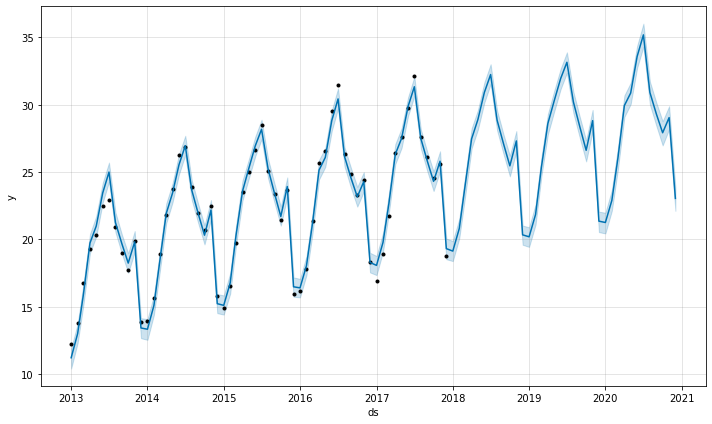

In [128]:
product_1_model.plot(forecast_item1)
plt.tight_layout()

In [129]:
product_2_model=Prophet(interval_width=0.8)
product_2_model.fit(product_sales_2)

10:51:15 - cmdstanpy - INFO - Chain [1] start processing
10:51:17 - cmdstanpy - INFO - Chain [1] done processing


In [130]:
product_3_model=Prophet(interval_width=0.8)
product_3_model.fit(product_sales_3)

10:51:19 - cmdstanpy - INFO - Chain [1] start processing
10:51:20 - cmdstanpy - INFO - Chain [1] done processing


In [131]:
product_4_model=Prophet(interval_width=0.8)
product_4_model.fit(product_sales_4)

10:51:21 - cmdstanpy - INFO - Chain [1] start processing
10:51:22 - cmdstanpy - INFO - Chain [1] done processing


In [132]:
product_5_model=Prophet(interval_width=0.8)
product_5_model.fit(product_sales_1)

10:51:22 - cmdstanpy - INFO - Chain [1] start processing
10:51:23 - cmdstanpy - INFO - Chain [1] done processing


In [133]:
forecast_item2=product_2_model.predict(future_dates)
forecast_item3=product_3_model.predict(future_dates)
forecast_item4=product_4_model.predict(future_dates)
forecast_item5=product_5_model.predict(future_dates)

Text(0.5, 1.0, 'Forecasting of Sales Item 1')

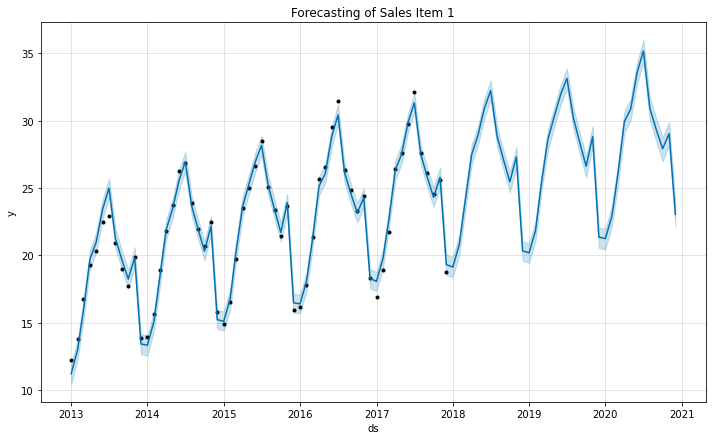

In [134]:
product_1_model.plot(forecast_item1)
plt.title('Forecasting of Sales Item 1')

Text(0.5, 1.0, 'Forecasting of Sales Item 2')

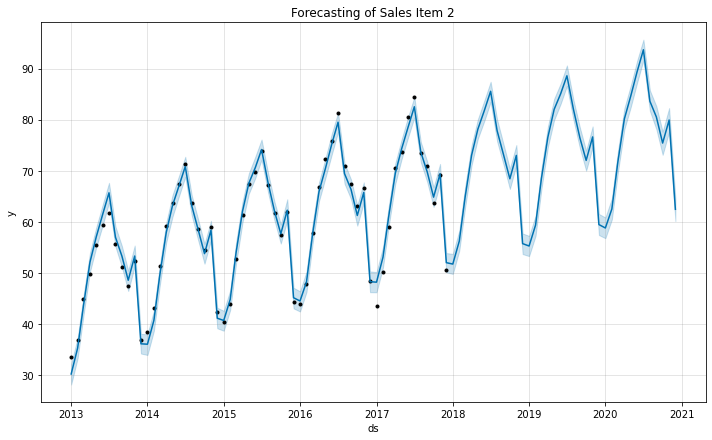

In [135]:
product_2_model.plot(forecast_item2)
plt.title('Forecasting of Sales Item 2')

Text(0.5, 1.0, 'Forecasting of Sales Item 3')

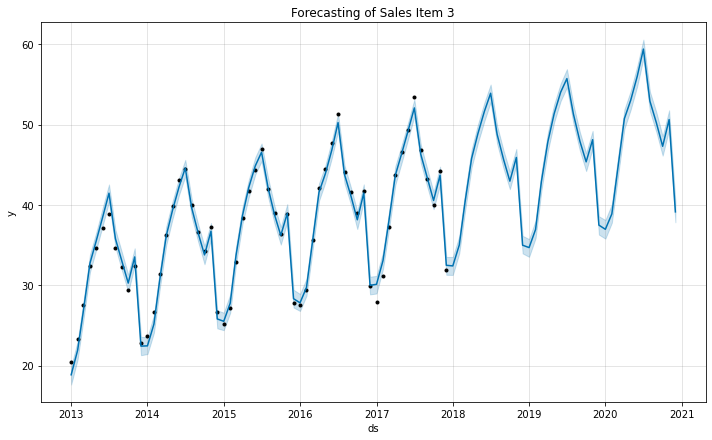

In [136]:
product_3_model.plot(forecast_item3)
plt.title('Forecasting of Sales Item 3')


Text(0.5, 1.0, 'Forecasting of Sales Item 4')

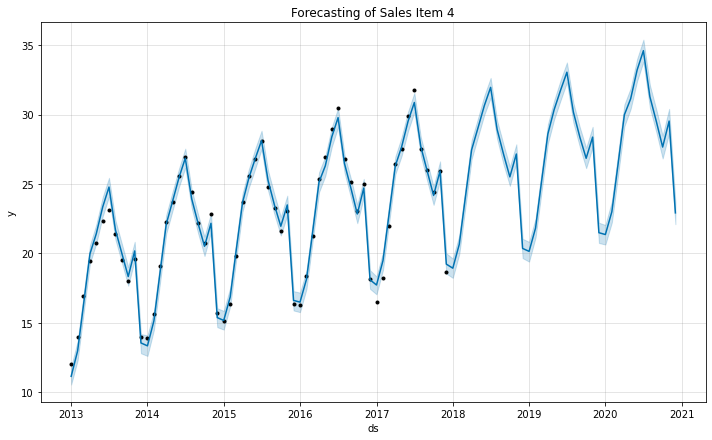

In [137]:
product_4_model.plot(forecast_item4)
plt.title('Forecasting of Sales Item 4')

Text(0.5, 1.0, 'Forecasting of Sales Item 5')

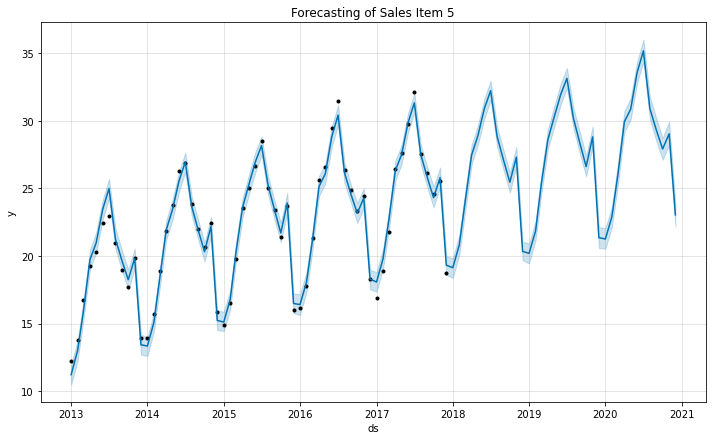

In [138]:
product_5_model.plot(forecast_item5)
plt.title('Forecasting of Sales Item 5')

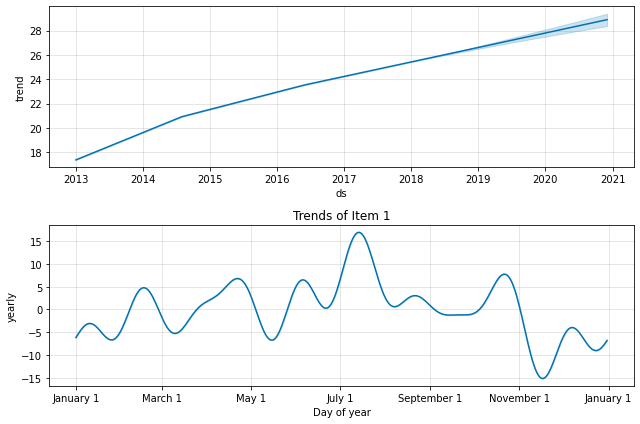

In [139]:
### Visualize the components trends
product_1_model.plot_components(forecast_item1)
plt.title('Trends of Item 1')
plt.tight_layout()

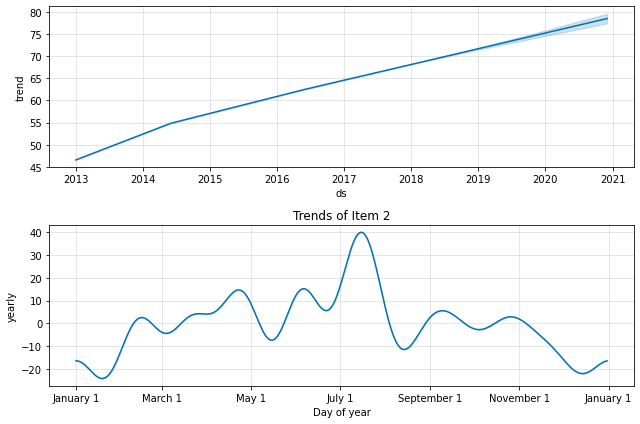

In [140]:
product_2_model.plot_components(forecast_item2)
plt.title('Trends of Item 2')
plt.tight_layout()


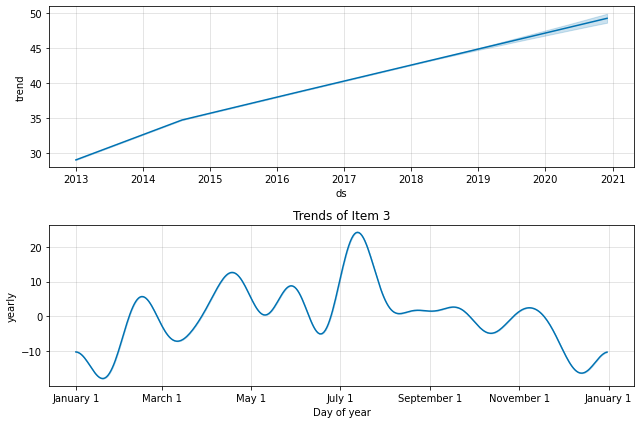

In [141]:
product_3_model.plot_components(forecast_item3)
plt.title('Trends of Item 3')
plt.tight_layout()

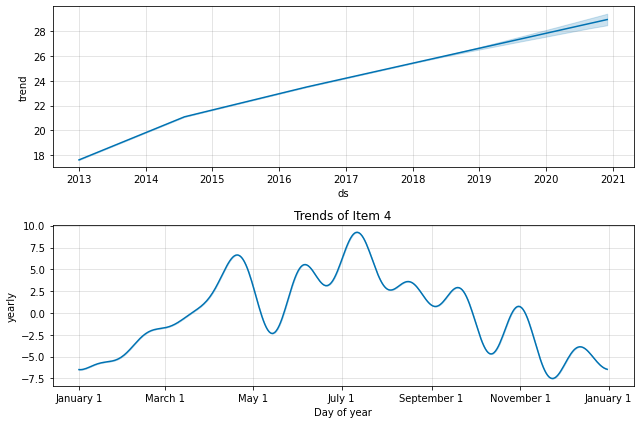

In [142]:
product_4_model.plot_components(forecast_item4)
plt.title('Trends of Item 4')
plt.tight_layout()

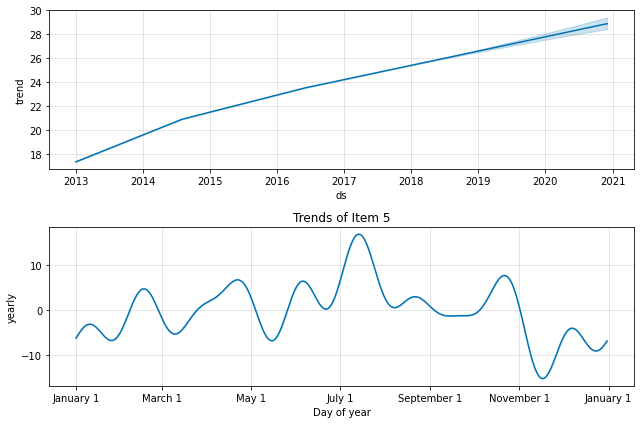

In [143]:
product_5_model.plot_components(forecast_item5)
plt.title('Trends of Item 5')
plt.tight_layout()

In [144]:
from prophet.diagnostics import cross_validation

In [145]:
df_cv= cross_validation(product_1_model,horizon='365 days',period='180 days',initial='1095 days')
df_cv.head()

  0%|          | 0/2 [00:00<?, ?it/s]

10:51:47 - cmdstanpy - INFO - Chain [1] start processing
10:51:48 - cmdstanpy - INFO - Chain [1] done processing
10:51:49 - cmdstanpy - INFO - Chain [1] start processing
10:51:49 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-07-01,28.319457,27.788014,28.846346,31.477419,2016-06-04
1,2016-08-01,26.871751,26.349334,27.475313,26.374194,2016-06-04
2,2016-09-01,24.414214,23.855630,24.960659,24.890000,2016-06-04
3,2016-10-01,22.986618,22.443401,23.536529,23.325806,2016-06-04
4,2016-11-01,24.113610,23.580045,24.676054,24.446667,2016-06-04


In [146]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
19,2017-08-01,28.288720,27.623593,28.964072,27.574194,2016-12-01
20,2017-09-01,26.538490,25.910671,27.252558,26.143333,2016-12-01
21,2017-10-01,25.033426,24.407164,25.708424,24.580645,2016-12-01
22,2017-11-01,26.643421,25.951777,27.384898,25.586667,2016-12-01
23,2017-12-01,20.246904,19.602280,20.932727,18.738710,2016-12-01


In [147]:
from prophet.diagnostics import performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,31 days,8.057870,2.838639,2.818236,0.123533,0.123533,0.121167,0.0
1,58 days,3.195289,1.787537,1.488034,0.082803,0.082803,0.077700,0.5
2,62 days,1.872656,1.368450,1.183892,0.058844,0.058844,0.056430,0.5
3,89 days,1.862060,1.364573,1.173006,0.058969,0.058969,0.056735,0.5
4,90 days,1.492107,1.221518,1.068231,0.047726,0.047726,0.046415,0.5


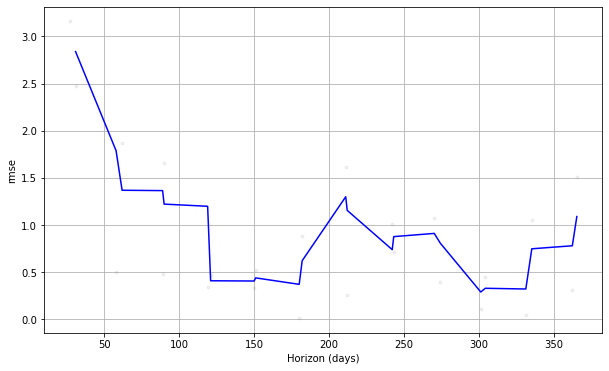

In [148]:
from prophet.plot import plot_cross_validation_metric
fig= plot_cross_validation_metric(df_cv,metric='rmse')

In [150]:
df_performance.columns

Index(['horizon', 'mse', 'rmse', 'mae', 'mape', 'mdape', 'smape', 'coverage'], dtype='object')

In [152]:
df_performance['rmse'].mean()

0.929235399882744

  INFERENCE (for Item 1)

* This value of RMSE is greater than RMSE value got from SARIMAX model (RMSE = 0.43) and lesser than RMSE value of both Base line model (RMSE = 2.97) and ARIMA model (RMSE = 24.75)

CONCLUSION
* SARIMAX model proves to be better performing compared to fbprophet and ARIMA maybe due to the presence of seasonality in the dataset.